In [1]:
from dtw import dtw
import matplotlib.pyplot as plt
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd

In [2]:
audio_file = 'audio_samples/wav/chai_tea_latte_word.wav'
ipd.Audio(audio_file)

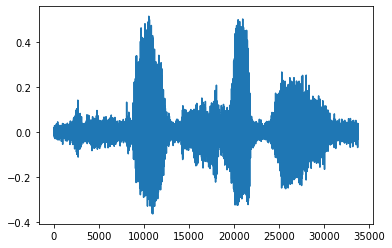

In [3]:
y, sr = librosa.load(audio_file)
plt.plot(y)

In [4]:
mfccs = librosa.feature.mfcc(y=y,sr = sr)
# librosa.display.specshow(mfccs, x_axis = 'time', sr = sr)
# plt.colorbar(format = "%+2f")

In [5]:
mfccs.shape

(20, 66)

In [7]:
yTest, srTest = librosa.load('audio_samples/wav/elias_mothers_milk_sentence.wav')
ipd.Audio('audio_samples/wav/elias_mothers_milk_sentence.wav')

In [8]:
y1, sr1 = librosa.load('audio_samples/wav/elias_mothers_milk_word.wav')
ipd.Audio('audio_samples/wav/elias_mothers_milk_word.wav')

In [9]:
y2, sr2 = librosa.load('audio_samples/wav/chris_mothers_milk_word.wav')
ipd.Audio('audio_samples/wav/chris_mothers_milk_word.wav')

In [10]:
y3, sr3 = librosa.load('audio_samples/wav/yaoquan_mothers_milk_word.wav')
ipd.Audio('audio_samples/wav/yaoquan_mothers_milk_word.wav')

In [11]:
#Convert the data to mfcc:
mfcc1 = librosa.feature.mfcc(y = y1, sr = sr1)
mfcc2 = librosa.feature.mfcc(y = y2, sr = sr2)
mfcc3 = librosa.feature.mfcc(y = y3, sr = sr3)
mfccTest = librosa.feature.mfcc(y = yTest, sr = srTest)

# Remove mean and normalize each column of MFCC 
import copy
def preprocess_mfcc(mfcc):
    mfcc_cp = copy.deepcopy(mfcc)
    for i in range(mfcc.shape[1]):
        mfcc_cp[:,i] = mfcc[:,i] - np.mean(mfcc[:,i])
        mfcc_cp[:,i] = mfcc_cp[:,i]/np.max(np.abs(mfcc_cp[:,i]))
    return mfcc_cp

mfcc1 = preprocess_mfcc(mfcc1)
mfcc2 = preprocess_mfcc(mfcc2)
mfcc3 = preprocess_mfcc(mfcc3)
mfccTest = preprocess_mfcc(mfccTest)

In [12]:
window_size = mfcc1.shape[1] #length of the word

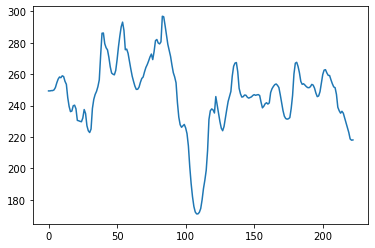

In [13]:
dists = np.zeros(mfccTest.shape[1] - window_size)

for i in range(len(dists)):
    mfcci = mfccTest[:,i:i+window_size]
    dist1i = dtw(mfcc1.T, mfcci.T, dist = lambda x, y: np.exp(np.linalg.norm(x - y, ord=1)))[0]
    dist2i = dtw(mfcc2.T, mfcci.T, dist = lambda x, y: np.exp(np.linalg.norm(x - y, ord=1)))[0]
    dist3i = dtw(mfcc3.T, mfcci.T, dist = lambda x, y: np.exp(np.linalg.norm(x - y, ord=1)))[0]
    dists[i] = (dist1i + dist2i + dist3i)/3
plt.plot(dists)

In [14]:
# select minimum distance window
word_match_idx = dists.argmin()
# convert MFCC to time domain
word_match_idx_bnds = np.array([word_match_idx,np.ceil(word_match_idx+window_size)])
samples_per_mfcc = 512
word_samp_bounds = (2/2) + (word_match_idx_bnds*samples_per_mfcc)
word = yTest[int(word_samp_bounds[0]):int(word_samp_bounds[1])]

In [15]:
ipd.Audio(data= word, rate=sr1)

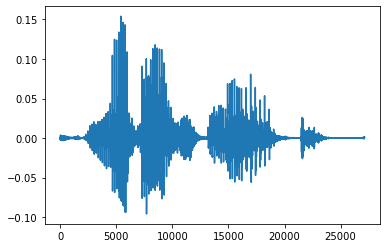

In [27]:

plt.plot(word)

In [29]:
ipd.Audio(data = yTest, rate = sr1)


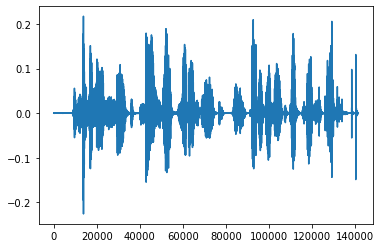

In [30]:

plt.plot(yTest)